In [2]:
import pandas as pd

census_data = pd.read_csv(r"C:\Users\Emil\Desktop\County election prediction 2024\PROJECT.csv")
X = census_data.iloc[:, 1:-1]  # All rows, all columns except the first and last
y = census_data.iloc[:, -1]   # All rows, only last column

Hyperparameter Optimization:

Tuning single parameters with cross_val_score:

In [3]:
#The code below runs 10-fold cross-validation for each value K (for KNN) from 1 to 40. The average score for each value is calculated and printed below.
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# search for an optimal value of K for KNN
k_range = list(range(1, 41))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.8332807602871298, 0.7912941057527044, 0.8568284298857547, 0.8450540895763826, 0.8600111212213124, 0.8498261045394804, 0.8663795369527854, 0.8587352138307551, 0.8705125872004853, 0.8625629360024263, 0.8701971489232637, 0.8663734708320696, 0.8701931048427864, 0.8689222525528258, 0.870831058538065, 0.8692387018501668, 0.8740137498736225, 0.8721008998079063, 0.8736962895561622, 0.8733778182185825, 0.8756030735011627, 0.8727388535031848, 0.875601051460924, 0.8733757961783439, 0.873692245475685, 0.8724203821656051, 0.8746476594884239, 0.8711495298756444, 0.8736932564958042, 0.8724224042058438, 0.8743291881508443, 0.8740137498736227, 0.8740097057931454, 0.8740107168132646, 0.8730542917804065, 0.873692245475685, 0.8727378424830656, 0.8727348094227076, 0.8730563138206451, 0.8730553028005257]


Text(0, 0.5, 'Cross-Validated Accuracy')

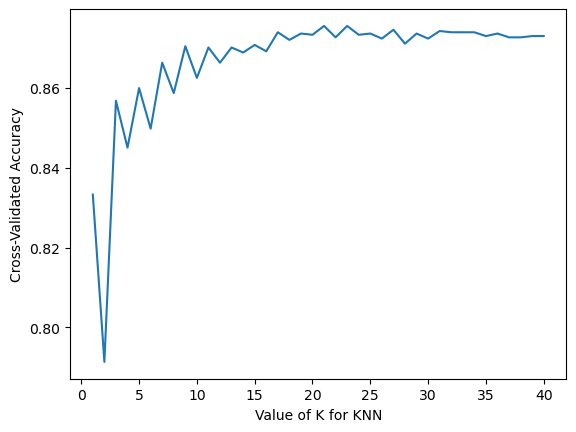

In [4]:
#For ease of interpretation, we plot the accuracy scores for each value of K. We see that 21 yields the highest out-of-sample accuracy:

import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Tuning multiple parameters with GridSearchCV

In [10]:
#GridSearchCV allows us to perform the same cross-validation testing with multiple parameters at once. Below, we find the optimal combination of K value (for KNN) and leaf_size:

from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
k_range = list(range(1, 41, 4))  # Step by 4
leaf_size_range = list(range(20, 50, 5))  # Step by 5

param_grid = dict(n_neighbors=k_range, leaf_size=leaf_size_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best score:", grid.best_score_)
print("Best params:", grid.best_params_)

# Access all CV results as a DataFrame
results = pd.DataFrame(grid.cv_results_)
print(results[['params', 'mean_test_score', 'std_test_score']])

# To get equivalent of grid_mean_scores:
grid_mean_scores = results['mean_test_score'].values

#grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

Best score: 0.8756030735011627
Best params: {'leaf_size': 20, 'n_neighbors': 21}
                                  params  mean_test_score  std_test_score
0    {'leaf_size': 20, 'n_neighbors': 1}         0.833281        0.027249
1    {'leaf_size': 20, 'n_neighbors': 5}         0.860011        0.020789
2    {'leaf_size': 20, 'n_neighbors': 9}         0.870513        0.025385
3   {'leaf_size': 20, 'n_neighbors': 13}         0.870193        0.022506
4   {'leaf_size': 20, 'n_neighbors': 17}         0.874014        0.020575
5   {'leaf_size': 20, 'n_neighbors': 21}         0.875603        0.015817
6   {'leaf_size': 20, 'n_neighbors': 25}         0.873692        0.013673
7   {'leaf_size': 20, 'n_neighbors': 29}         0.873693        0.014520
8   {'leaf_size': 20, 'n_neighbors': 33}         0.874010        0.014125
9   {'leaf_size': 20, 'n_neighbors': 37}         0.872738        0.014384
10   {'leaf_size': 25, 'n_neighbors': 1}         0.833281        0.027249
11   {'leaf_size': 25, 'n_neigh

In [17]:
#Using the optimal hyper parameters found in the previous steps, we can calcluate the average out-of-sample accuracy for KNN. We find that KNN produces a model with predictions that are ~81.2% accurate.

knn = KNeighborsClassifier(n_neighbors=21, leaf_size=20)
scores = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')

print(scores.mean())

0.8124589199093697
